# Outlier Handling

Outliers are data points that significantly deviate from the rest of the data. They can arise from:

1. Measurement Errors: Faulty equipment or data entry errors.
2. Genuine Extreme Values: Real but unusual occurrences.
3. Sampling Errors: Unrepresentative samples.

Outliers can distort statistical analyses and negatively impact machine learning model performance.

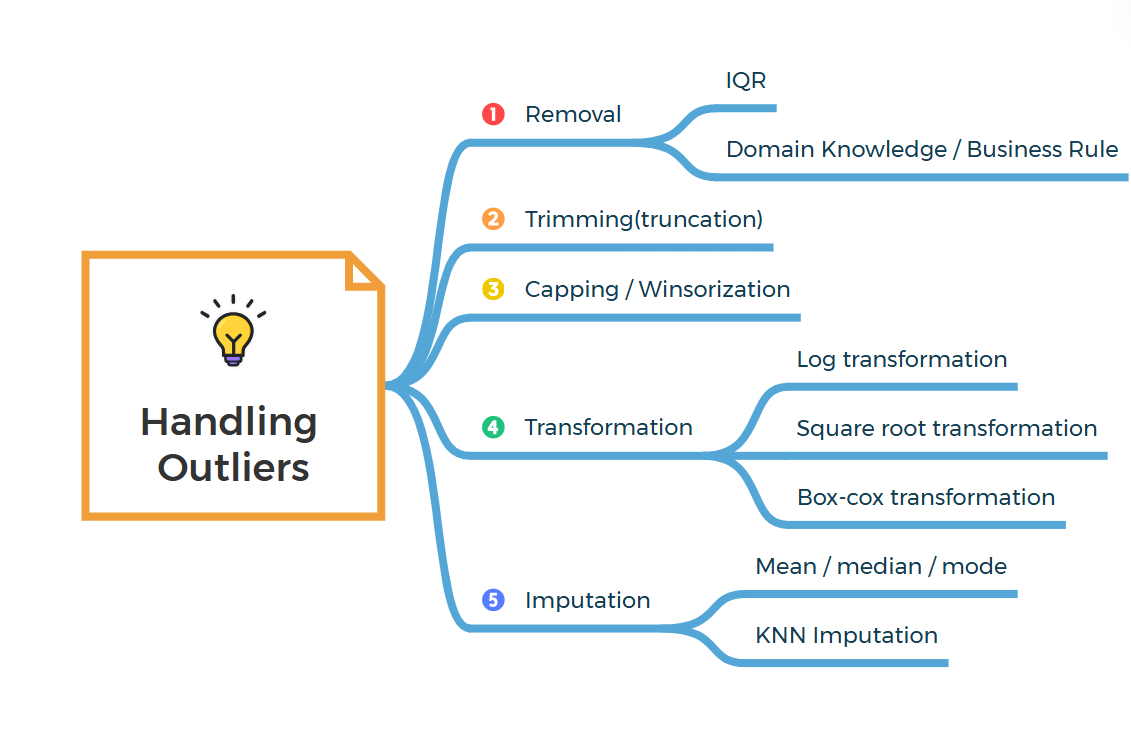

# 1. Removal


# A. IQR Based Removal (The "Middle Range" Method)



What is IQR?

1. Imagine you line up all the purchase amounts from smallest to largest.
2. The IQR is like finding the "middle range" of those amounts. It's the range where most of the "typical" purchases fall.

How it Works:

We find the "middle range" (IQR).

Then, we set "fences" around that range. Anything way outside those fences is considered an outlier and we remove it.

Think of it like this:

We're saying, "We're only interested in the purchases that are within this normal range. Anything too far outside is probably not a typical customer and we'll ignore it."

When to use it:

1. When you want a method that automatically identifies and removes values that are far from the typical range.
2. When you don't have specific knowledge of what a normal range is.

### Import Necessary Dependencies

In [29]:
import pandas as pd
import numpy as np

In [34]:
# Create a DataFrame
data = pd.DataFrame({
    'CustomerID': [1, 1, 2, 3, 1, 2, 3, 4, 5, 6],
    'Event': ['Purchase', 'Visit', 'Purchase', 'Visit', 'Purchase', 'Visit', 'Purchase', 'Visit', 'Purchase', 'Visit'],
    'Timestamp': pd.to_datetime(['2025-03-01 10:00:00', '2025-03-05 14:30:00', '2025-02-25 09:15:00',
                                   '2025-03-03 18:00:00', '2025-03-12 11:45:00', '2025-03-08 20:00:00',
                                   '2025-03-15 16:20:00', '2025-03-17 08:00:00', '2025-03-20 10:00:00', '2025-03-25 10:00:00']),
    'Time_Since_Last_Purchase': [5.0, 5.0, 20.0, 2.0, 5.0, 20.0, 2.0, 1.0, 1.0, 1000.0],  # 1000 is an obvious error
    'Purchase_Amount': [100, 50, 200, 75, 150, 80, 180, 90, 50000.0, 120]  # 50000 is an error
})

print("Original Data:\n")
data

Original Data:



,CustomerID,Event,Timestamp,Time_Since_Last_Purchase,Purchase_Amount
0,1,Purchase,2025-03-01 10:00:00,5.0,100.0
1,1,Visit,2025-03-05 14:30:00,5.0,50.0
2,2,Purchase,2025-02-25 09:15:00,20.0,200.0
3,3,Visit,2025-03-03 18:00:00,2.0,75.0
4,1,Purchase,2025-03-12 11:45:00,5.0,150.0
5,2,Visit,2025-03-08 20:00:00,20.0,80.0
6,3,Purchase,2025-03-15 16:20:00,2.0,180.0
7,4,Visit,2025-03-17 08:00:00,1.0,90.0
8,5,Purchase,2025-03-20 10:00:00,1.0,50000.0
9,6,Visit,2025-03-25 10:00:00,1000.0,120.0


Removal of Values that are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR

In [35]:
# --- 1. Removal (using IQR as outlier detection) ---

def remove_outliers_iqr(df, column):
    """
    Removes outliers based on the IQR method.

    Args:
        df (pd.DataFrame): The DataFrame.
        column (str): The column to check.

    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [36]:
# Example 1: Removing outliers in 'Time_Since_Last_Purchase'

data_removed_time = remove_outliers_iqr(data.copy(), 'Time_Since_Last_Purchase')
print("\nData after Removal (IQR) - Time_Since_Last_Purchase:\n")
data_removed_time


Data after Removal (IQR) - Time_Since_Last_Purchase:



,CustomerID,Event,Timestamp,Time_Since_Last_Purchase,Purchase_Amount
0,1,Purchase,2025-03-01 10:00:00,5.0,100.0
1,1,Visit,2025-03-05 14:30:00,5.0,50.0
2,2,Purchase,2025-02-25 09:15:00,20.0,200.0
3,3,Visit,2025-03-03 18:00:00,2.0,75.0
4,1,Purchase,2025-03-12 11:45:00,5.0,150.0
5,2,Visit,2025-03-08 20:00:00,20.0,80.0
6,3,Purchase,2025-03-15 16:20:00,2.0,180.0
7,4,Visit,2025-03-17 08:00:00,1.0,90.0
8,5,Purchase,2025-03-20 10:00:00,1.0,50000.0


Removed the row where 'Time_Since_Last_Purchase' column value was 1000

In [37]:
# Example 2: Removing outliers in 'Purchase_Amount'

data_removed_amount = remove_outliers_iqr(data.copy(), 'Purchase_Amount')
print("\nData after Removal (IQR) - Purchase_Amount:\n")
data_removed_amount


Data after Removal (IQR) - Purchase_Amount:



,CustomerID,Event,Timestamp,Time_Since_Last_Purchase,Purchase_Amount
0,1,Purchase,2025-03-01 10:00:00,5.0,100.0
1,1,Visit,2025-03-05 14:30:00,5.0,50.0
2,2,Purchase,2025-02-25 09:15:00,20.0,200.0
3,3,Visit,2025-03-03 18:00:00,2.0,75.0
4,1,Purchase,2025-03-12 11:45:00,5.0,150.0
5,2,Visit,2025-03-08 20:00:00,20.0,80.0
6,3,Purchase,2025-03-15 16:20:00,2.0,180.0
7,4,Visit,2025-03-17 08:00:00,1.0,90.0
9,6,Visit,2025-03-25 10:00:00,1000.0,120.0


Removed the row where 'Purchase_Amount' column value was 50000

## B. Domain knowledge / Business Rule based removal

What is Domain Knowledge?

It's what we know about our business and our customers. For example, we might know that most people in Kolkata buying men's sports apparel don't spend more than 5,000 rupees in a single purchase.

How it Works:

We use our "common sense" or business knowledge to set rules about what's considered normal.

For example, we might say, "Any purchase over 5,000 rupees is an outlier and we'll remove it."

Think of it like this:

We're saying, "Based on what we know about our customers, this value just doesn't make sense, so we'll remove it."

When to use it:

1. When you have a good understanding of your business and your customers.
2. When you have clear rules about what's considered a valid or reasonable value.

For example, you know that delivery time cannot be more than 10 days.

In [38]:
import pandas as pd
import numpy as np

In [43]:
# Sample DataFrame

data = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Product_Type': ['T-shirt', 'Shorts', 'Track Pants', 'T-shirt', 'Shorts',
                     'Joggers', 'Cap', 'T-shirt', 'Shorts', 'T-shirt'],
    'Purchase_Amount': [500, 1200, 800, 600, 1500, 2000, 100, 700, 1300, 100000],  # 100000 is an outlier
    'Discount_Percentage': [0.1, 0.05, 0.15, 0.08, 0.03, 0.0, 0.2, 0.5, 0.07, 0.12],
    'Delivery_Time_Days': [2, 3, 4, 30, 5, 6, 1, 3, 4, 8]  # 30 days is an outlier
})

print("Original Data:\n")
data

Original Data:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500,0.10,2
1,2,Shorts,1200,0.05,3
2,3,Track Pants,800,0.15,4
3,4,T-shirt,600,0.08,30
4,5,Shorts,1500,0.03,5
5,6,Joggers,2000,0.00,6
6,7,Cap,100,0.20,1
7,8,T-shirt,700,0.50,3
8,9,Shorts,1300,0.07,4
9,10,T-shirt,100000,0.12,8


Rule 1: Maximum reasonable purchase amount (e.g., 5000 INR)

Rule 2: Maximum reasonable delivery time (e.g., 10 days)

Rule 3: Discount percentage cannot be higher than 30%


In [44]:
# --- Removal based on Domain Knowledge/Business Rules ---

def remove_outliers_business_rules(df):
    """
    Removes outliers based on predefined business rules.

    Args:
        df (pd.DataFrame): The DataFrame.

    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """

    # Rule 1: Maximum reasonable purchase amount (e.g., 5000 INR)
    max_purchase_amount = 5000
    df = df[df['Purchase_Amount'] <= max_purchase_amount]

    # Rule 2: Maximum reasonable delivery time (e.g., 10 days)
    max_delivery_time = 10
    df = df[df['Delivery_Time_Days'] <= max_delivery_time]

    #Rule 3: Discount percentage cannot be higher than 30%
    max_discount_percentage = 0.30
    df = df[df['Discount_Percentage'] <= max_discount_percentage]

    return df

In [45]:
data_removed_business = remove_outliers_business_rules(data.copy())
print("\nData after Removal (Business Rules):\n")
data_removed_business


Data after Removal (Business Rules):



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500,0.10,2
1,2,Shorts,1200,0.05,3
2,3,Track Pants,800,0.15,4
4,5,Shorts,1500,0.03,5
5,6,Joggers,2000,0.00,6
6,7,Cap,100,0.20,1
8,9,Shorts,1300,0.07,4


The row with 'Purchase_Amount' as 100000 , Discount_Percentage as 50% and Delivery_Time_Days as 30 are removed

In Simple Terms:

1. IQR: We remove values that are too far from the "middle range" of the data.

2. Business Rules: We remove values that don't make sense based on what we know about our business.

# 2. Trimming

What is Trimming?

1. Trimming is like saying, "We're going to ignore the very best and very worst dives."
2. We decide on a percentage, like "We'll ignore the top 10% and the bottom 10% of scores."
3. Then, we remove those top and bottom scores from our calculations.
4. This way, the really bad and really good dives don't affect the final results as much.

Why Do We Trim?

1. Just like in diving, a single bad or amazing dive shouldn't completely change the diver's overall score.
2. In our data, a few extreme values (outliers) shouldn't distort the overall picture.
3. Trimming helps us focus on the "typical" or "average" performance, ignoring the extremes.

How it Works:

Let's say we're looking at the "Purchase Amount" of our customers.

Most customers spend between 500 and 2000 rupees.

But a few customers might spend 10,000 or 100,000 rupees.

If we trim 10% from the top and bottom, we'll remove those very high purchase amounts.

This gives us a better idea of how much a "typical" customer spends.

In Simple Terms:

Trimming is like cutting off the "ends" of our data.

We decide how much to cut off (the percentage).

This helps us focus on the "middle" or "typical" data.

Important Note:

1. Trimming means we lose some data.
2. We have to be careful not to trim too much, or we might lose important information.
3. It's best used when we have a lot of data, so losing a bit doesn't hurt too much.

In [46]:
import pandas as pd
import numpy as np

In [47]:
# Sample DataFrame

data = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Product_Type': ['T-shirt', 'Shorts', 'Track Pants', 'T-shirt', 'Shorts',
                     'Joggers', 'Cap', 'T-shirt', 'Shorts', 'T-shirt'],
    'Purchase_Amount': [500, 1200, 800, 600, 1500, 2000, 100, 700, 1300, 100000],  # 100000 is an outlier
    'Discount_Percentage': [0.1, 0.05, 0.15, 0.08, 0.03, 0.0, 0.2, 0.12, 0.07, 0.5],
    'Delivery_Time_Days': [2, 3, 4, 2, 5, 6, 1, 3, 4, 30]  # 30 days is an outlier
})

print("Original Data:\n")
data

Original Data:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500,0.10,2
1,2,Shorts,1200,0.05,3
2,3,Track Pants,800,0.15,4
3,4,T-shirt,600,0.08,2
4,5,Shorts,1500,0.03,5
5,6,Joggers,2000,0.00,6
6,7,Cap,100,0.20,1
7,8,T-shirt,700,0.12,3
8,9,Shorts,1300,0.07,4
9,10,T-shirt,100000,0.50,30


In [48]:
# --- Trimming (Truncation) ---

def trim_outliers_percentile(df, column, trim_percent=0.1):
    """
    Trims outliers based on percentiles.

    Args:
        df (pd.DataFrame): The DataFrame.
        column (str): The column to trim.
        trim_percent (float): The percentage of data to trim from each tail.

    Returns:
        pd.DataFrame: DataFrame with outliers trimmed.
    """
    lower_percentile = df[column].quantile(trim_percent)
    upper_percentile = df[column].quantile(1 - trim_percent)
    trimmed_df = df[(df[column] >= lower_percentile) & (df[column] <= upper_percentile)]
    return trimmed_df

In [49]:
# Example 1: Trimming 'Purchase_Amount' (10% from each tail)

data_trimmed_purchase = trim_outliers_percentile(data.copy(), 'Purchase_Amount', trim_percent=0.1)
print("\nData after Trimming (10%) - Purchase_Amount:\n")
data_trimmed_purchase


Data after Trimming (10%) - Purchase_Amount:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500,0.10,2
1,2,Shorts,1200,0.05,3
2,3,Track Pants,800,0.15,4
3,4,T-shirt,600,0.08,2
4,5,Shorts,1500,0.03,5
5,6,Joggers,2000,0.00,6
7,8,T-shirt,700,0.12,3
8,9,Shorts,1300,0.07,4


In [50]:
# Example 2: Trimming 'Delivery_Time_Days' (20% from each tail)

data_trimmed_delivery = trim_outliers_percentile(data.copy(), 'Delivery_Time_Days', trim_percent=0.2)
print("\nData after Trimming (20%) - Delivery_Time_Days:\n")
data_trimmed_delivery


Data after Trimming (20%) - Delivery_Time_Days:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500,0.10,2
1,2,Shorts,1200,0.05,3
2,3,Track Pants,800,0.15,4
3,4,T-shirt,600,0.08,2
4,5,Shorts,1500,0.03,5
7,8,T-shirt,700,0.12,3
8,9,Shorts,1300,0.07,4


In [51]:
# Example 3: Trimming 'Discount_Percentage' (5% from each tail)

data_trimmed_discount = trim_outliers_percentile(data.copy(), 'Discount_Percentage', trim_percent=0.05)
print("\nData after Trimming (5%) - Discount_Percentage:\n")
data_trimmed_discount


Data after Trimming (5%) - Discount_Percentage:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500,0.10,2
1,2,Shorts,1200,0.05,3
2,3,Track Pants,800,0.15,4
3,4,T-shirt,600,0.08,2
4,5,Shorts,1500,0.03,5
6,7,Cap,100,0.20,1
7,8,T-shirt,700,0.12,3
8,9,Shorts,1300,0.07,4


Key Points:

1. Percentile Choice: The trim_percent parameter determines how much data is removed from each tail. Adjust this value based on your data and the severity of outliers.
2. Data Loss: Trimming leads to data loss, so choose the trim percentage carefully.
3. Symmetry: Trimming removes data symmetrically from both tails.
4. Robustness: Trimming is more robust to extreme outliers than methods that rely on the mean and standard deviation.
5. Context: Consider the context of your data and the potential impact of data loss before using trimming.

# 3. Capping / Winsorization

What is Capping?

1. Capping is like setting a "maximum limit" for how many books a customer can buy.
2. For example, we might say, "We'll consider any purchase over 10 books as just 10 books."
3. So, if someone buys 20 books, we'll count it as 10.
4. We're "capping" the extreme values at a certain point.

What is Winsorization?

1. Winsorization is like setting both a "maximum" and a "minimum" limit.
2. We might say, "We'll consider any purchase over 10 books as 10 books, and any purchase below 1 book as 1 book."
3. So, if someone buys 20 books, we'll count it as 10, and if someone buys 0 books, we'll count it as 1.
4. We're "winsorizing" both the high and low extreme values.

Why Do We Cap or Winsorize?

1. We don't want a few very large or very small purchases to distort our overall understanding of customer behavior.
2. Capping or Winsorization helps us keep the data points, but reduces their impact.
3.It's like saying, "We know these extreme purchases happened, but we don't want them to throw off our calculations."

How it Works :

1. Let's say we're looking at the "Purchase Amount" of our customers.
2. We notice some customers spend 10,000 or 100,000 rupees.
3. If we cap the purchase amount at 5,000 rupees, any purchase over 5,000 will be counted as just 5,000.
4. If we winsorize, we might also set a minimum purchase amount (e.g., 200 rupees).
5. This way, we still have the data from those customers, but their extreme purchases don't skew our analysis.

In Simple Terms:

1. Capping: We set a "maximum" limit.
2. Winsorization: We set both a "maximum" and a "minimum" limit.
3. This helps us keep the data but reduce the impact of extreme values.
Important Note:

We need to choose the "limits" carefully.

It's like deciding what's a "reasonable" purchase amount or book purchase.
We don't want to cap or winsorize too much, or we might lose important information.

In [52]:
import pandas as pd
import numpy as np

In [53]:
# Sample DataFrame
data = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Product_Type': ['T-shirt', 'Shorts', 'Track Pants', 'T-shirt', 'Shorts',
                     'Joggers', 'Cap', 'T-shirt', 'Shorts', 'T-shirt'],
    'Purchase_Amount': [500, 1200, 800, 600, 1500, 2000, 100, 700, 1300, 100000],  # 100000 is an outlier
    'Discount_Percentage': [0.1, 0.05, 0.15, 0.08, 0.03, 0.0, 0.2, 0.12, 0.07, 0.5],
    'Delivery_Time_Days': [2, 3, 4, 2, 5, 6, 1, 3, 4, 30]  # 30 days is an outlier
})

print("Original Data:\n")
data

Original Data:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500,0.10,2
1,2,Shorts,1200,0.05,3
2,3,Track Pants,800,0.15,4
3,4,T-shirt,600,0.08,2
4,5,Shorts,1500,0.03,5
5,6,Joggers,2000,0.00,6
6,7,Cap,100,0.20,1
7,8,T-shirt,700,0.12,3
8,9,Shorts,1300,0.07,4
9,10,T-shirt,100000,0.50,30


In [54]:
# --- Capping/Winsorization ---

def winsorize_outliers_percentile(df, column, lower_percent=0.05, upper_percent=0.95):
    """
    Winsorizes outliers based on percentiles.

    Args:
        df (pd.DataFrame): The DataFrame.
        column (str): The column to winsorize.
        lower_percent (float): The lower percentile for capping.
        upper_percent (float): The upper percentile for capping.

    Returns:
        pd.DataFrame: DataFrame with outliers winsorized.
    """
    lower_bound = df[column].quantile(lower_percent)
    upper_bound = df[column].quantile(upper_percent)
    winsorized_df = df.copy()
    winsorized_df[column] = np.where(winsorized_df[column] < lower_bound, lower_bound, winsorized_df[column])
    winsorized_df[column] = np.where(winsorized_df[column] > upper_bound, upper_bound, winsorized_df[column])
    return winsorized_df

In [55]:
# Example 1: Winsorizing 'Purchase_Amount' (5th and 95th percentiles)

data_winsorized_purchase = winsorize_outliers_percentile(data.copy(), 'Purchase_Amount')
print("\nData after Winsorization (5th and 95th percentiles) - Purchase_Amount:\n")
data_winsorized_purchase


Data after Winsorization (5th and 95th percentiles) - Purchase_Amount:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500.0,0.10,2
1,2,Shorts,1200.0,0.05,3
2,3,Track Pants,800.0,0.15,4
3,4,T-shirt,600.0,0.08,2
4,5,Shorts,1500.0,0.03,5
5,6,Joggers,2000.0,0.00,6
6,7,Cap,280.0,0.20,1
7,8,T-shirt,700.0,0.12,3
8,9,Shorts,1300.0,0.07,4
9,10,T-shirt,55900.0,0.50,30


In [56]:
# Example 2: Winsorizing 'Delivery_Time_Days' (10th and 90th percentiles)

data_winsorized_delivery = winsorize_outliers_percentile(data.copy(), 'Delivery_Time_Days', lower_percent=0.1, upper_percent=0.9)
print("\nData after Winsorization (10th and 90th percentiles) - Delivery_Time_Days:\n")
data_winsorized_delivery


Data after Winsorization (10th and 90th percentiles) - Delivery_Time_Days:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500,0.10,2.0
1,2,Shorts,1200,0.05,3.0
2,3,Track Pants,800,0.15,4.0
3,4,T-shirt,600,0.08,2.0
4,5,Shorts,1500,0.03,5.0
5,6,Joggers,2000,0.00,6.0
6,7,Cap,100,0.20,1.9
7,8,T-shirt,700,0.12,3.0
8,9,Shorts,1300,0.07,4.0
9,10,T-shirt,100000,0.50,8.4


In [57]:
# Example 3: Winsorizing 'Discount_Percentage' (2nd and 98th percentiles)

data_winsorized_discount = winsorize_outliers_percentile(data.copy(), 'Discount_Percentage', lower_percent=0.02, upper_percent=0.98)
print("\nData after Winsorization (2nd and 98th percentiles) - Discount_Percentage:\n")
data_winsorized_discount


Data after Winsorization (2nd and 98th percentiles) - Discount_Percentage:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500,0.1000,2
1,2,Shorts,1200,0.0500,3
2,3,Track Pants,800,0.1500,4
3,4,T-shirt,600,0.0800,2
4,5,Shorts,1500,0.0300,5
5,6,Joggers,2000,0.0054,6
6,7,Cap,100,0.2000,1
7,8,T-shirt,700,0.1200,3
8,9,Shorts,1300,0.0700,4
9,10,T-shirt,100000,0.4460,30


In [58]:
def cap_outliers_upper_percentile(df, column, upper_percent=0.95):
    """
    Caps outliers at the upper percentile.

    Args:
        df (pd.DataFrame): The DataFrame.
        column (str): The column to cap.
        upper_percent (float): The upper percentile for capping.

    Returns:
        pd.DataFrame: DataFrame with outliers capped.
    """
    upper_bound = df[column].quantile(upper_percent)
    capped_df = df.copy()
    capped_df[column] = np.where(capped_df[column] > upper_bound, upper_bound, capped_df[column])
    return capped_df

In [59]:
# Example 4: Capping only on the upper bound for Purchase amount

data_capped_purchase = cap_outliers_upper_percentile(data.copy(), 'Purchase_Amount')
print("\nData after Upper Capping (95th percentile) - Purchase_Amount:\n")
data_capped_purchase


Data after Upper Capping (95th percentile) - Purchase_Amount:



,CustomerID,Product_Type,Purchase_Amount,Discount_Percentage,Delivery_Time_Days
0,1,T-shirt,500.0,0.10,2
1,2,Shorts,1200.0,0.05,3
2,3,Track Pants,800.0,0.15,4
3,4,T-shirt,600.0,0.08,2
4,5,Shorts,1500.0,0.03,5
5,6,Joggers,2000.0,0.00,6
6,7,Cap,100.0,0.20,1
7,8,T-shirt,700.0,0.12,3
8,9,Shorts,1300.0,0.07,4
9,10,T-shirt,55900.0,0.50,30


Key Points:

1. Percentile Choice: The percentile values determine the range of values that are considered "normal." Adjust these values based on your data and the severity of outliers.
2. Data Preservation: Winsorization/capping preserves data points while reducing the impact of extreme values.
3. Distribution Impact: Be aware that winsorization/capping can distort the distribution of the data.
4. Context: Consider the context of your data and the potential impact of winsorization/capping before applying it.
5. Capping vs Winsorization: Capping only changes one side of the distribution, while winsorization changes both sides of the distribution.

# ** Note

1. Transformation for handling outliers are taken seperately in Feature transformation
2. Imputation will be handled as part of missing value handling , only difference is their we are identifying missing value and replacing and here we will replace the outlier through imputation
3. Their are algorithms like Isolation forest , DBScan which helps in identification of outliers , we will take them as algorithms seperately